/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


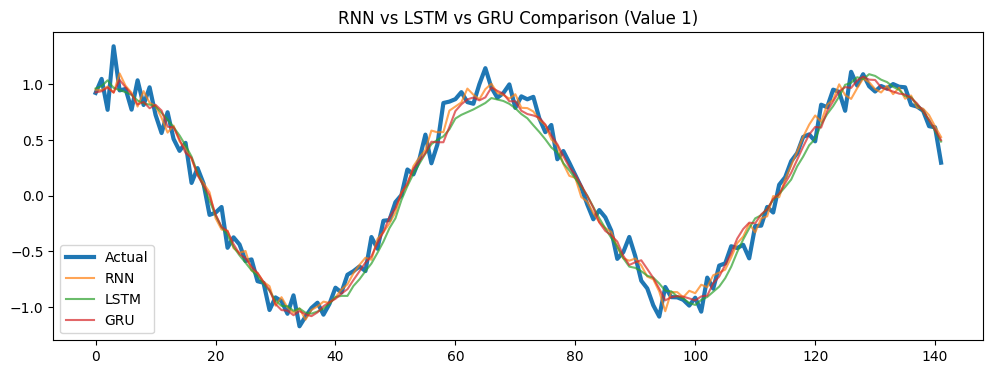

RNN Loss:  0.0347
LSTM Loss: 0.0344
GRU Loss:  0.0337


In [ ]:
# MINIMAL CODE TO COMPARE RNN, LSTM, GRU
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
import pandas as pd

# 1. LOAD HOURLY DATA
try:
    data_hourly = pd.read_csv('hourly_data.csv', parse_dates=['datetime'])
    # Use 'value1' and 'value2' columns as features
    data = data_hourly[['value1', 'value2']].values
except FileNotFoundError:
    print("Error: hourly_data.csv not found. Please run the cell to create the CSV first.")
    exit() # Exit if the file is not found

# 2. PREPARE SEQUENCES
def create_sequences(data, steps=10):
    X, y = [], []
    for i in range(len(data) - steps):
        X.append(data[i:i+steps])
        y.append(data[i+steps]) # Predict the next step's values
    return np.array(X), np.array(y)

X, y = create_sequences(data, steps=10)
split = int(len(X) * 0.8) # Use 80% for training
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Determine input shape based on the loaded data (steps, number of features)
input_shape = (X_train.shape[1], X_train.shape[2])
output_shape = y_train.shape[1] # Number of features in the output

# 3. BUILD & TRAIN RNN
rnn = Sequential([
    SimpleRNN(50, input_shape=input_shape),
    Dense(output_shape)
])
rnn.compile(optimizer='adam', loss='mse')
rnn.fit(X_train, y_train, epochs=20, verbose=0)

# 4. BUILD & TRAIN LSTM
lstm = Sequential([
    LSTM(50, input_shape=input_shape),
    Dense(output_shape)
])
lstm.compile(optimizer='adam', loss='mse')
lstm.fit(X_train, y_train, epochs=20, verbose=0)

# 5. BUILD & TRAIN GRU
gru = Sequential([
    GRU(50, input_shape=input_shape),
    Dense(output_shape)
])
gru.compile(optimizer='adam', loss='mse')
gru.fit(X_train, y_train, epochs=20, verbose=0)

# 6. COMPARE PREDICTIONS
rnn_pred = rnn.predict(X_test, verbose=0)
lstm_pred = lstm.predict(X_test, verbose=0)
gru_pred = gru.predict(X_test, verbose=0)

# 7. PLOT COMPARISON (Plotting the first feature for simplicity)
plt.figure(figsize=(12, 4))
plt.plot(y_test[:, 0], label='Actual', linewidth=3)
plt.plot(rnn_pred[:, 0], label='RNN', alpha=0.7)
plt.plot(lstm_pred[:, 0], label='LSTM', alpha=0.7)
plt.plot(gru_pred[:, 0], label='GRU', alpha=0.7)
plt.legend()
plt.title('RNN vs LSTM vs GRU Comparison (Value 1)')
plt.show()

# 8. PRINT SCORES
print(f"RNN Loss:  {rnn.evaluate(X_test, y_test, verbose=0):.4f}")
print(f"LSTM Loss: {lstm.evaluate(X_test, y_test, verbose=0):.4f}")
print(f"GRU Loss:  {gru.evaluate(X_test, y_test, verbose=0):.4f}")

In [ ]:
import pandas as pd
import numpy as np

# Create sample hourly data
dates = pd.date_range(start='2023-01-01', periods=24*30, freq='H') # 30 days of hourly data
values1 = np.sin(np.arange(0, len(dates)) * 0.1) + np.random.randn(len(dates)) * 0.1
values2 = np.cos(np.arange(0, len(dates)) * 0.05) + np.random.randn(len(dates)) * 0.2

data_hourly = pd.DataFrame({'datetime': dates, 'value1': values1, 'value2': values2})

# Save to CSV
data_hourly.to_csv('hourly_data.csv', index=False)

print("Hourly data CSV created successfully!")

Hourly data CSV created successfully!


/tmp/ipython-input-576045662.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start='2023-01-01', periods=24*30, freq='H') # 30 days of hourly data
